## Techniques for Feature Selection and Parameter Optimization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import titanic data using pandas

Original unmodified Titanic data is available at <a href="http://lib.stat.cmu.edu/S/Harrell/data/ascii/titanic.txt">CMU StatLib</a>.

### We are trying to predict who survived and who didn't survive based on where they embarked, how much they paid, which class where they in,etc. 

In [3]:
url = "../../data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(10)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton
5,6,1st,1,male,48.0,0,0,26.549999,Southampton
6,7,1st,1,female,63.0,1,0,77.958298,Southampton
7,8,1st,0,male,39.0,0,0,0.000000,Southampton
8,9,1st,1,female,53.0,2,0,51.479199,Southampton
9,10,1st,0,male,71.0,0,0,49.504200,Cherbourg


In [4]:
titanic.describe(include="all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,655.000000,NaN,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,982.000000,NaN,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


#### Handling missing variables

In [5]:
titanic[titanic.age.isnull()].shape # looking for values where age is null.

(264, 9)

In [6]:
# we need to infer age by looking at the mean and replacing the missing value with the mean age
age_mean = titanic.age.mean()
titanic.age.fillna(age_mean, axis=0, inplace=True)
titanic.dropna(axis=0, inplace=True) # drop any categorical rows that are missing. 

In [7]:
titanic.shape

(1306, 9)

In [8]:
titanic.set_index('pid', drop=True, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


#### Creating dummy variables for categorical features

In [9]:
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(10)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,1,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,0,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,0,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,0,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1
6,1,48.000000,0,0,26.549999,1,0,0,0,1,0,0,1
7,1,63.000000,1,0,77.958298,1,0,0,1,0,0,0,1
8,0,39.000000,0,0,0.000000,1,0,0,0,1,0,0,1
9,1,53.000000,2,0,51.479199,1,0,0,1,0,0,0,1


In [45]:
titanic_names = titanic_ssf.columns.values
titanic_names
print(type(titanic_names))

<class 'numpy.ndarray'>


In [46]:
titanic_names

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_1st', 'pclass_2nd',
       'pclass_3rd', 'sex_female', 'sex_male', 'embarked_Cherbourg',
       'embarked_Queenstown', 'embarked_Southampton'], dtype=object)

In [47]:
titanic_names[1:]

array(['age', 'sibsp', 'parch', 'fare', 'pclass_1st', 'pclass_2nd',
       'pclass_3rd', 'sex_female', 'sex_male', 'embarked_Cherbourg',
       'embarked_Queenstown', 'embarked_Southampton'], dtype=object)

In [11]:
y = titanic_ssf['survived']
X = titanic_ssf[titanic_names[1:]] # extract the rest of the columns with the exception of survived
X.head()

,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,
1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1


In [12]:
titanic_ssf.describe()

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
count,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.381317,29.854661,0.50000,0.385911,33.223956,0.245789,0.212098,0.542113,0.355283,0.644717,0.206738,0.094181,0.699081
std,0.485896,12.812320,1.04258,0.866357,51.765986,0.430719,0.408950,0.498414,0.478782,0.478782,0.405121,0.292192,0.458833
min,0.000000,0.166700,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.00000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.908852,0.00000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.00000,0.000000,31.275000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.00000,9.000000,512.329224,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
titanic_ssf.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.000000
age,1306.0,29.854661,12.812320,0.1667,22.0000,29.908852,35.000,80.000000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.000000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.000000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.329224
pclass_1st,1306.0,0.245789,0.430719,0.0000,0.0000,0.000000,0.000,1.000000
pclass_2nd,1306.0,0.212098,0.408950,0.0000,0.0000,0.000000,0.000,1.000000
pclass_3rd,1306.0,0.542113,0.498414,0.0000,0.0000,1.000000,1.000,1.000000
sex_female,1306.0,0.355283,0.478782,0.0000,0.0000,0.000000,1.000,1.000000
sex_male,1306.0,0.644717,0.478782,0.0000,0.0000,1.000000,1.000,1.000000


#### Build the training and testing dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [15]:
# Now let's train the decision tree on the training data

from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)


#### A versatile function to measure performance of a calssification model

In [16]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print ("Confussion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [17]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.752 

Classification report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       161
           1       0.68      0.67      0.68       101

    accuracy                           0.75       262
   macro avg       0.74      0.74      0.74       262
weighted avg       0.75      0.75      0.75       262
 



### Feature Selection

#### Select the top 30% of the most important features, using a chi2 test

In [18]:
from sklearn import feature_selection

In [19]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [20]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print (fs.get_support()) 
print (fs.scores_)

[False False False  True  True False False  True  True False False False]
[  17.19    0.     22.34 5185.44   61.98    1.28   35.15  189.1   102.94
   27.57    0.01    8.16]


<p>The trues are the ones that were actually used and the other ones where it isn't, that is where it is false and you can use the actual scores of these features. </p>
<p> You scored them all but you took only the top 30%.</p>

In [21]:
X.columns.values

array(['age', 'sibsp', 'parch', 'fare', 'pclass_1st', 'pclass_2nd',
       'pclass_3rd', 'sex_female', 'sex_male', 'embarked_Cherbourg',
       'embarked_Queenstown', 'embarked_Southampton'], dtype=object)

In [22]:
# these are just the column values but you can get which ones actually you had support for, you actually get the indicies of the ones used and look at their values. 
print (X.columns[fs.get_support()].values)

['fare' 'pclass_1st' 'sex_female' 'sex_male']


<p>So these are the features that were actually selected</p>

In [23]:
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        print (X.columns.values[i],'\t', fs.scores_[i])

fare 	 5185.440645522608
pclass_1st 	 61.98414742146332
sex_female 	 189.1011725770034
sex_male 	 102.94265016026222


<p>This gives us the support of the value of the different scores. You can see the value of these fatures. </p>

In [24]:
print (X_train_fs) # x_train_fs contains the 30% of the features which we ranked.

[[31.39  0.    0.    1.  ]
 [15.05  0.    0.    1.  ]
 [91.08  1.    0.    1.  ]
 ...
 [21.    0.    1.    0.  ]
 [31.5   0.    0.    1.  ]
 [ 7.9   0.    0.    1.  ]]


#### Evaluate performance with the new feature set on test data

In [25]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train) # train your classifier with the x important features. 
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.821 



<p>The accuracy went up from 0.74 to 0.82. </p>

#### To do feature selection more systematically, we need to find the best percentile using cross-validation

1 0.7011547662863451
6 0.7011547662863451
11 0.7614740522635259
16 0.7614740522635259
21 0.7614740522635259
26 0.7614740522635259
31 0.7585986382039014
36 0.7585986382039014
41 0.7681772175193228
46 0.7643356643356642
51 0.7643356643356642
56 0.7576278984173721
61 0.7576278984173721
66 0.7528662127346338
71 0.7557600294442399
76 0.7528754140596245
81 0.7567077659182921
86 0.7490522635259478
91 0.7566985645933014
96 0.7528754140596245
8
Optimal percentile of features:41 

optimal_num_features:  4
Optimal number of features:4 



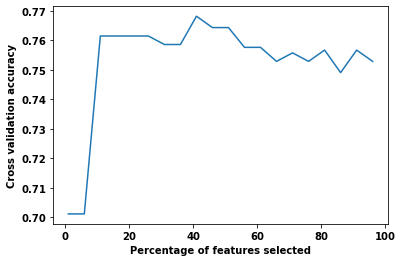

In [26]:
# You can't just randomly do 30% 
# you are going to try and see what would be the right percentile of features that you need and this is what this function is doing. 
# it is varying how many right percentile of features do we need.
# Remember you are also training a classifier with it. 

from sklearn import model_selection
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=5)
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(X.columns)/100)
print('optimal_num_features:  %s' %(optimal_num_features))
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

<p>Depending on your percentile, you pick your highest accuracy.</p>

### Evaluate our best number of features on the test set

<p> NOW you training the entire training set using the right percentile and you would get a high accuracy of 0.82</p>

In [27]:
fs = feature_selection.SelectKBest(score_func = feature_selection.chi2, k = optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train) 
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262
 



In [28]:
feature_selection.SelectKBest?

### Model selection

<p>This section is about trying multiple criteria for tree, for example using gini or entropy and comparing them. </p>

#### Exploring and comparing model parameters

In [29]:
print (dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#### Let's first focus on "criterion' parameter and find the best one

In [30]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=5)
print ("Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))
dt = tree.DecisionTreeClassifier(criterion='gini')
scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=5)
print ("Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))


Entropy criterion accuracy on cv: 0.759
Gini criterion accuracy on cv: 0.759


<p>Here you would find out if you need one over the other. In this case do I need to use entropy?</p>

In [31]:
dt.fit(X_train_fs, y_train) # Here we use the right percentile of features to train the classifier
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262
 



In [32]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train) # training with the entire data set
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.725 



<p>The accuracy went back down. </p>

#### Another parameter of decision tree that can have an impact on accuracy is 'max-depth'

In [33]:
# We are varying some of these parameters. 
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=5)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.794 



#### But, again, we need a more systematic way to explore the space of values for each parameter. The following is a general function that performs cross-validation using a range of values for a specified parameter of a model

In [49]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### Now we can explore the impact of max-depth more systematically

In [52]:
# Let's create an evenly spaced range of numbers in a specified interval
md = np.linspace(1, 40, 20)
md = np.array([int(e) for e in md])
print (type(md))

<class 'numpy.ndarray'>


#### This is a good exploratory function to give us a sense of what is the range we should be passing, which in the end gives us the max depth value as 3

max_depth  =  1
max_depth  =  3
max_depth  =  5
max_depth  =  7
max_depth  =  9
max_depth  =  11
max_depth  =  13
max_depth  =  15
max_depth  =  17
max_depth  =  19
max_depth  =  21
max_depth  =  23
max_depth  =  25
max_depth  =  27
max_depth  =  29
max_depth  =  31
max_depth  =  33
max_depth  =  35
max_depth  =  37
max_depth  =  40


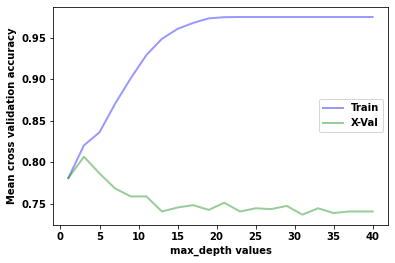

In [51]:
train_scores, test_scores = calc_params(X_train, y_train, dt, md, 'max_depth', 5)

#### max_depth = 3 seems to work best; larger values seem to lead to over-fitting.

In [37]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=3)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.798 



#### Another parameter of decision tree that's important is the min number of samples allowed at a leaf node

min_samples_leaf  =  1
min_samples_leaf  =  3
min_samples_leaf  =  5
min_samples_leaf  =  7
min_samples_leaf  =  9
min_samples_leaf  =  11
min_samples_leaf  =  13
min_samples_leaf  =  15
min_samples_leaf  =  17
min_samples_leaf  =  19
min_samples_leaf  =  21
min_samples_leaf  =  23
min_samples_leaf  =  25
min_samples_leaf  =  27
min_samples_leaf  =  30


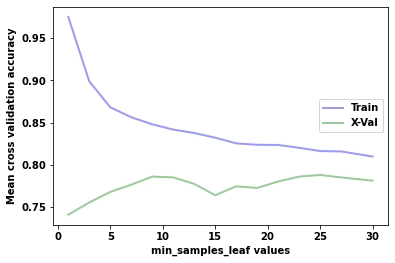

In [38]:
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train, y_train, dt, msl, 'min_samples_leaf', 5)


<p>So, we pick something between 10 and 11.</p>

### Looks like min_samples_leaf around 11 seems like a good choice

In [39]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(min_samples_leaf=10)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.771 



#### Grid Search allows us to more systemiatically explore different combinations of multiple parameters

In [48]:
import math
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

# min_samples_split (same for min_samples_leaf)
# if int, then consider min_samples_split as the minimum number.
# if float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples)
#print (len(X))
sample_leaf_fractions = np.linspace(0.0005, 0.02, 15)*13.06
#roundup = lambda i: math.ceil(100*i)
#vectorized_ceil = np.vectorize(roundup)
#vectorized_ceil(sample_fractions)
#min_samples_leaf = vectorized_ceil(sample_fractions)
#print(sample_fractions)
#print(min_samples_leaf)
#print(np.linspace(1, 30, 15),)

sample_split_fractions = np.linspace(0.0005, 0.015, 10)*13.06
parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10),
    'min_samples_leaf': sample_leaf_fractions,
    'min_samples_split': sample_split_fractions
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [41]:
%time _ = gs.fit(X_train, y_train)



Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Wall time: 2min


In [42]:
gs.best_params_, gs.best_score_ # how do derive min_samples_leaf=3, min_samples_split=2

({'criterion': 'entropy',
  'max_depth': 3.111111111111111,
  'min_samples_leaf': 0.00653,
  'min_samples_split': 0.00653},
 0.8122285609127715)

<p><strong>We get the best parameters associated with the best scores and you can train your entire training set with the best estimators</strong></p>

In [43]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.798 

Classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       161
           1       0.75      0.71      0.73       101

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262
 



In [44]:
X_train.shape

(1044, 12)